# Projet 6
### Détectez des faux-billets

#### SOMMAIRE

 - <a href='#mission0'>Mission 0 : Analyses bi-variées</a>
- <a href='#diff0'>différences longueurs</a>
- <a href='#diff1'>différences hauteurs gauches</a>
- <a href='#diff2'>différences hauteurs droites</a>
- <a href='#diff3'>différences marges basses</a>
- <a href='#diff4'>différences marges hautes</a>
- <a href='#diff5'>différences diagonales</a>

- <a href='#mission1'>Mission 1 : Analyse par composantes principales</a>


- <a href='#mission2'>Mission 2 : Clustering</a>


- <a href='#mission3'>Mission 3 : Regression logistique</a>


- <a href='#test'>Partie test</a>

In [1]:
#On importe les librairies utiles
library (plyr)
library(dplyr)
library(factoextra)
library(repr)
library(tibble)
library(corrplot)
library(lattice)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: ggplot2
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ
corrplot 0.84 loaded


In [2]:
df_billets <- read.csv("/Users/utilisateur/Google Drive/OC Data Analyst HUOT DE LONGCHAMP Charles/PROJET 6/billets.csv")


<a id='mission0'></a>

#### Mission 0 : Analyses bi-variées

In [3]:
head(df_billets,3)

is_genuine,length,height_left,height_right,margin_low,margin_up,diagonal
True,171.81,104.86,104.95,4.52,2.89,112.83
True,171.67,103.74,103.70,4.01,2.87,113.29
True,171.83,103.76,103.76,4.40,2.88,113.84


In [4]:
summary(df_billets)

 is_genuine      length       height_left     height_right     margin_low   
 False: 70   Min.   :171.0   Min.   :103.2   Min.   :103.1   Min.   :3.540  
 True :100   1st Qu.:171.7   1st Qu.:103.8   1st Qu.:103.7   1st Qu.:4.050  
             Median :171.9   Median :104.1   Median :104.0   Median :4.450  
             Mean   :171.9   Mean   :104.1   Mean   :103.9   Mean   :4.612  
             3rd Qu.:172.1   3rd Qu.:104.3   3rd Qu.:104.2   3rd Qu.:5.128  
             Max.   :173.0   Max.   :104.9   Max.   :105.0   Max.   :6.280  
   margin_up        diagonal    
 Min.   :2.270   Min.   :110.0  
 1st Qu.:3.013   1st Qu.:111.9  
 Median :3.170   Median :112.8  
 Mean   :3.170   Mean   :112.6  
 3rd Qu.:3.330   3rd Qu.:113.3  
 Max.   :3.680   Max.   :114.0  

In [5]:
df_na <- df_billets[rowSums(is.na(df_billets)) > 0,] #Afficher tous les NA dans toutes les variables
df_na

is_genuine,length,height_left,height_right,margin_low,margin_up,diagonal


##### On sépare les deux types de billets (vrais et faux) pour les étudier

In [6]:
df_real <- filter(df_billets, is_genuine == "True")
df_fake <- filter(df_billets, is_genuine == "False")

<a id='diff0'></a>

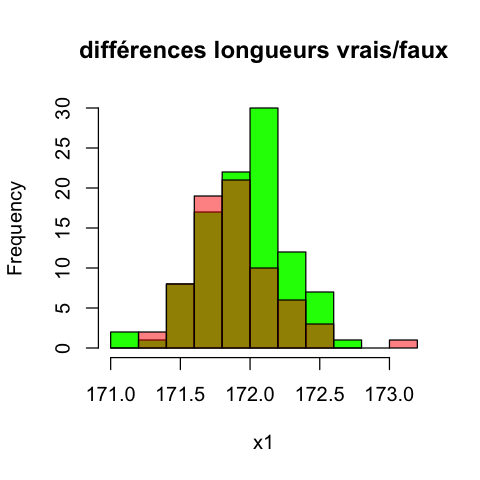

In [7]:
options(repr.plot.width=4, repr.plot.height=4)#taille du graph

x1 <- df_real$length
x2 <- df_fake$length

## Histogrammes non-imprimés :
bp1 <- hist(x1, plot=FALSE)
bp2 <- hist(x2, plot=FALSE)

## Calcul de minima/maxima :
hlims <- range(c(bp1$breaks, bp2$breaks))
vlims <- range(c(bp1$counts, bp2$counts))

## Couleurs de remplissage, dont une avec ajout de transparence :
histcol <- sapply(apply(rbind(col2rgb(c("green", "red"))/255,
                              alpha = c(1, 0.5)), # Première couleur opaque, 50% de transparence pour la seconde.
                        2, as.list),
                  do.call, what = rgb)

## Création du graphique :
hist(x1, border="black", xlim=hlims, ylim=vlims,          
     col=histcol[1], main="différences longueurs vrais/faux")

hist(x2, border="black", add=TRUE,
     breaks=seq(from=min(hlims), to=max(hlims), by=diff(bp1$breaks[1:2])), # ...largeur de classes égale à celle
                                                                           # du précédent graphique
     col=histcol[2])      # Couleur transparente (en sur-impression).

In [ ]:
<a id='diff1'></a>

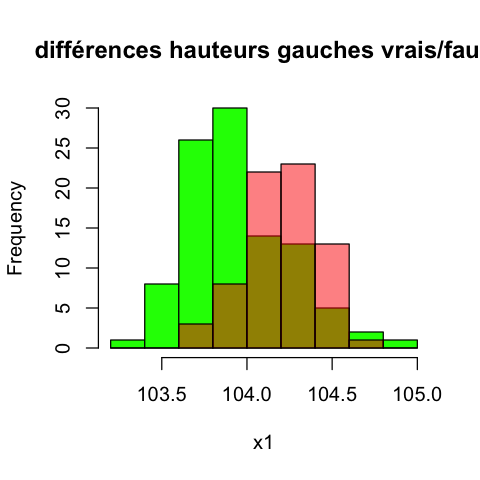

In [8]:
x1 <- df_real$height_left
x2 <- df_fake$height_left

## Histogrammes non-imprimés :
bp1 <- hist(x1, plot=FALSE)
bp2 <- hist(x2, plot=FALSE)

## Calcul de minima/maxima :
hlims <- range(c(bp1$breaks, bp2$breaks))
vlims <- range(c(bp1$counts, bp2$counts))

## Couleurs de remplissage, dont une avec ajout de transparence :
histcol <- sapply(apply(rbind(col2rgb(c("green", "red"))/255,
                              alpha = c(1, 0.5)), # Première couleur opaque, 50% de transparence pour la seconde.
                        2, as.list),
                  do.call, what = rgb)

## Création du graphique :
hist(x1, border="black", xlim=hlims, ylim=vlims,          
     col=histcol[1], main="différences hauteurs gauches vrais/faux")

hist(x2, border="black", add=TRUE,
     breaks=seq(from=min(hlims), to=max(hlims), by=diff(bp1$breaks[1:2])), # ...largeur de classes égale à celle
                                                                           # du précédent graphique
     col=histcol[2])      # Couleur transparente (en sur-impression).

In [ ]:
<a id='diff2'></a>

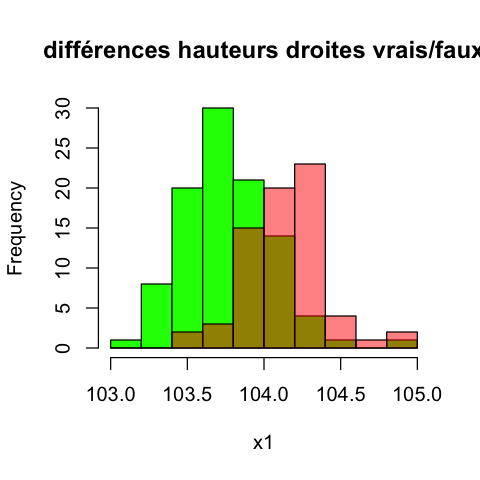

In [9]:
x1 <- df_real$height_right
x2 <- df_fake$height_right

## Histogrammes non-imprimés :
bp1 <- hist(x1, plot=FALSE)
bp2 <- hist(x2, plot=FALSE)

## Calcul de minima/maxima :
hlims <- range(c(bp1$breaks, bp2$breaks))
vlims <- range(c(bp1$counts, bp2$counts))

## Couleurs de remplissage, dont une avec ajout de transparence :
histcol <- sapply(apply(rbind(col2rgb(c("green", "red"))/255,
                              alpha = c(1, 0.5)), # Première couleur opaque, 50% de transparence pour la seconde.
                        2, as.list),
                  do.call, what = rgb)

## Création du graphique :
hist(x1, border="black", xlim=hlims, ylim=vlims,          
     col=histcol[1], main="différences hauteurs droites vrais/faux")

hist(x2, border="black", add=TRUE,
     breaks=seq(from=min(hlims), to=max(hlims), by=diff(bp1$breaks[1:2])), # ...largeur de classes égale à celle
                                                                           # du précédent graphique
     col=histcol[2])      # Couleur transparente (en sur-impression).

In [ ]:
<a id='diff3'></a>

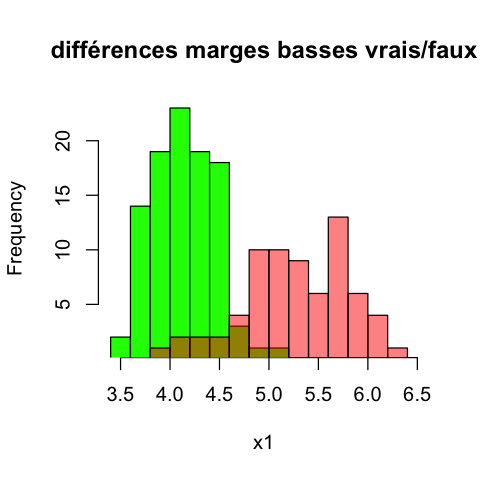

In [10]:
x1 <- df_real$margin_low
x2 <- df_fake$margin_low

## Histogrammes non-imprimés :
bp1 <- hist(x1, plot=FALSE)
bp2 <- hist(x2, plot=FALSE)

## Calcul de minima/maxima :
hlims <- range(c(bp1$breaks, bp2$breaks))
vlims <- range(c(bp1$counts, bp2$counts))

## Couleurs de remplissage, dont une avec ajout de transparence :
histcol <- sapply(apply(rbind(col2rgb(c("green", "red"))/255,
                              alpha = c(1, 0.5)), # Première couleur opaque, 50% de transparence pour la seconde.
                        2, as.list),
                  do.call, what = rgb)

## Création du graphique :
hist(x1, border="black", xlim=hlims, ylim=vlims,          
     col=histcol[1], main="différences marges basses vrais/faux")

hist(x2, border="black", add=TRUE,
     breaks=seq(from=min(hlims), to=max(hlims), by=diff(bp1$breaks[1:2])), # ...largeur de classes égale à celle
                                                                           # du précédent graphique
     col=histcol[2])      # Couleur transparente (en sur-impression).

In [ ]:
<a id='diff4'></a>

ERROR: Error in hist.default(x2, border = "black", add = TRUE, breaks = seq(from = min(hlims), : some 'x' not counted; maybe 'breaks' do not span range of 'x'


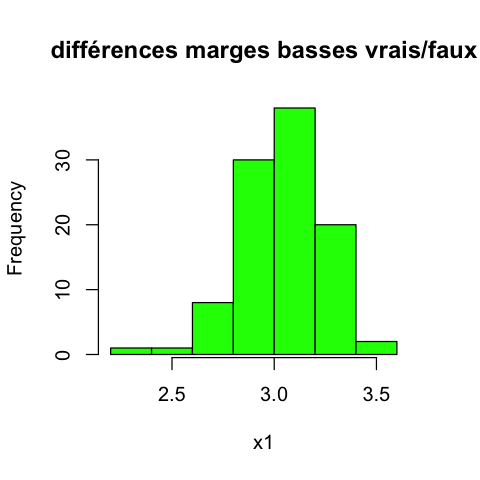

In [19]:
x1 <- df_real$margin_up
x2 <- df_fake$margin_up

## Histogrammes non-imprimés :
bp1 <- hist(x1, plot=FALSE)
bp2 <- hist(x2, plot=FALSE)

## Calcul de minima/maxima :
hlims <- range(c(bp1$breaks, bp2$breaks))
vlims <- range(c(bp1$counts, bp2$counts))

## Couleurs de remplissage, dont une avec ajout de transparence :
histcol <- sapply(apply(rbind(col2rgb(c("green", "red"))/255,
                              alpha = c(1, 0.5)), # Première couleur opaque, 50% de transparence pour la seconde.
                        2, as.list),
                  do.call, what = rgb)

## Création du graphique :
hist(x1, border="black", xlim=hlims, ylim=vlims,          
     col=histcol[1], main="différences marges hautes vrais/faux")

hist(x2, border="black", add=TRUE,
     breaks=seq(from=min(hlims), to=max(hlims), by=diff(bp1$breaks[1:2])), # ...largeur de classes égale à celle
                                                                           # du précédent graphique
     col=histcol[2])      # Couleur transparente (en sur-impression).

In [ ]:
<a id='diff5'></a>

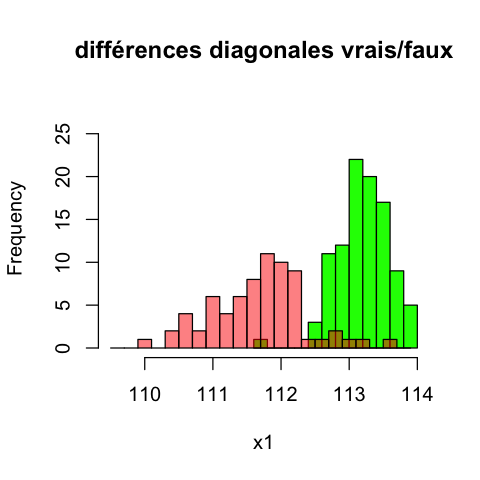

In [20]:
x1 <- df_real$diagonal
x2 <- df_fake$diagonal

## Histogrammes non-imprimés :
bp1 <- hist(x1, plot=FALSE)
bp2 <- hist(x2, plot=FALSE)

## Calcul de minima/maxima :
hlims <- range(c(bp1$breaks, bp2$breaks))
vlims <- range(c(bp1$counts, bp2$counts))

## Couleurs de remplissage, dont une avec ajout de transparence :
histcol <- sapply(apply(rbind(col2rgb(c("green", "red"))/255,
                              alpha = c(1, 0.5)), # Première couleur opaque, 50% de transparence pour la seconde.
                        2, as.list),
                  do.call, what = rgb)

## Création du graphique :
hist(x1, border="black", xlim=hlims, ylim=vlims,          
     col=histcol[1], main="différences diagonales vrais/faux")

hist(x2, border="black", add=TRUE,
     breaks=seq(from=min(hlims), to=max(hlims), by=diff(bp1$breaks[1:2])), # ...largeur de classes égale à celle
                                                                           # du précédent graphique
     col=histcol[2])      # Couleur transparente (en sur-impression).

<a id='mission1'></a>

#### Mission 1 : ACP

In [21]:
res.pca <- prcomp(df_billets[2:7], center = TRUE, scale = TRUE) #option centrer et reduire en TRUE
var <- get_pca_var(res.pca)

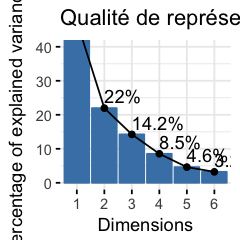

In [22]:
# analyse de la qualité de représentation des axes
options(repr.plot.width=2, repr.plot.height=2)#taille du graph

fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 40), main="Qualité de représentation des axes") 


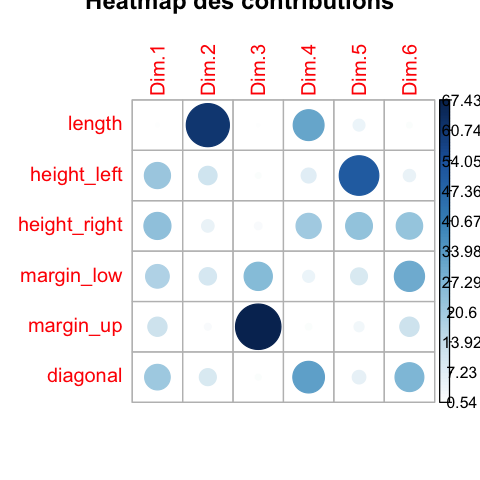

In [23]:
#Heatmap de la qualité des représentations
options(repr.plot.width=4, repr.plot.height=4)#taille du graph

corrplot(var$contrib, is.corr=FALSE, main="Heatmap des contributions") #Heatmap des contributions

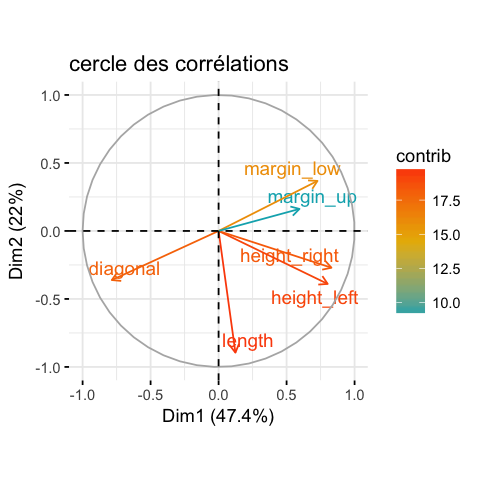

In [24]:
#Cercle des corrélations
fviz_pca_var(res.pca,axes = c(1,2), col.var="contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE, title ="cercle des corrélations") # Eviter d'avoir du chevauchement sur le texte

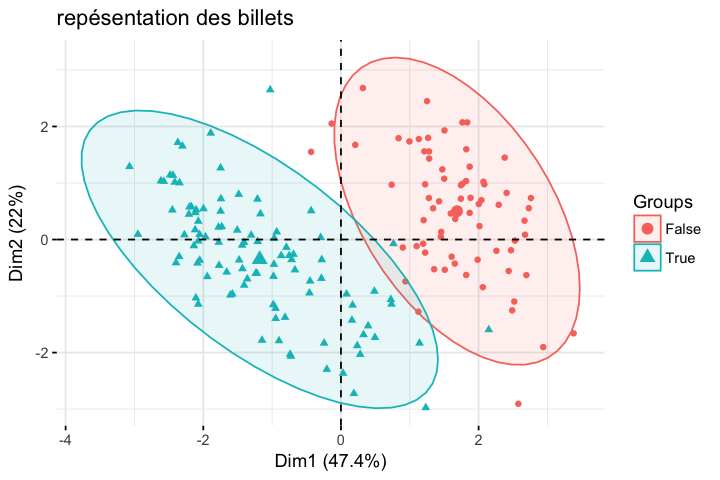

In [25]:
options(repr.plot.width=6, repr.plot.height=4)#taille du graph

fviz_pca_ind(res.pca, label="none", habillage=df_billets$is_genuine,
             addEllipses=TRUE, ellipse.level=0.95, title="repésentation des billets")

<a id='mission2'></a>

#### Mission 2 : clustering

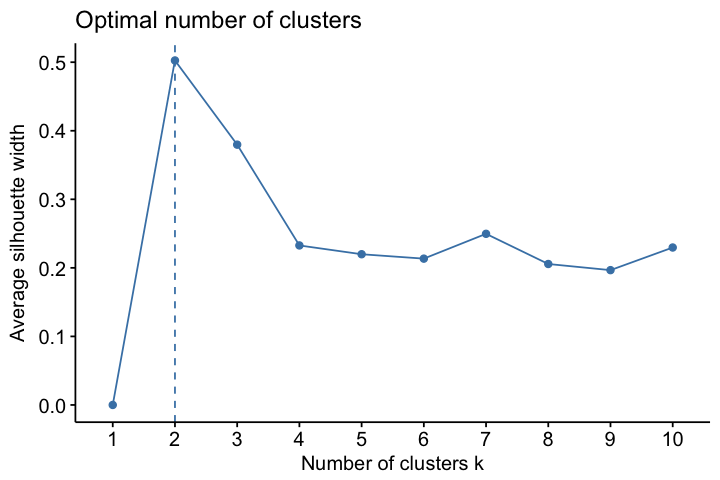

In [26]:
#connaitre le nombre de cluster optimal

fviz_nbclust(df_billets[2:7], kmeans, method = "silhouette")#Méthode de la silhouette


In [27]:
# clustering en 5 cluster (comme il est demandé)
res <- hcut(df_billets[2:7], k = 2, stand = TRUE)

# J'ajoute la variable cluster à mon DataFrame
df_billets[,"cluster"] <- res$cluster
head(df_billets)


is_genuine,length,height_left,height_right,margin_low,margin_up,diagonal,cluster
True,171.81,104.86,104.95,4.52,2.89,112.83,1
True,171.67,103.74,103.70,4.01,2.87,113.29,2
True,171.83,103.76,103.76,4.40,2.88,113.84,2
True,171.80,103.78,103.65,3.73,3.12,113.63,2
True,172.05,103.70,103.75,5.04,2.27,113.55,2
True,172.57,104.65,104.44,4.54,2.99,113.16,2


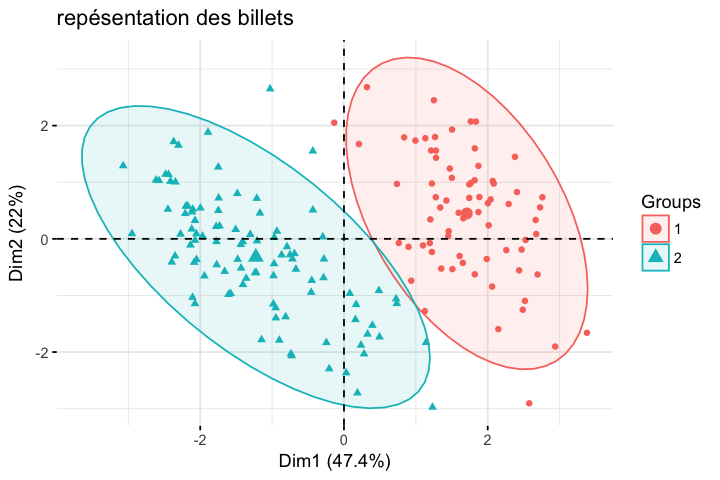

In [28]:
fviz_pca_ind(res.pca, label="none", habillage=res$cluster,
             addEllipses=TRUE, ellipse.level=0.95, title="repésentation des billets")

In [29]:
#Je cherche les outliers

df_faux_negatif <- filter(df_billets, is_genuine == "True" & cluster == 1)

df_faux_positif <- filter(df_billets, is_genuine == "False" & cluster == 2)

In [30]:
df_faux_negatif
df_faux_positif

is_genuine,length,height_left,height_right,margin_low,margin_up,diagonal,cluster
True,171.81,104.86,104.95,4.52,2.89,112.83,1
True,171.94,104.11,104.16,4.08,3.35,111.76,1


is_genuine,length,height_left,height_right,margin_low,margin_up,diagonal,cluster
False,171.56,103.8,103.87,5.66,2.98,112.95,2


In [ ]:
<a id='mission3'></a>

#### Mission 3 : Régression logistique

In [31]:
model <- glm(formula= vs ~ wt, data=mtcars, family=binomial)

In [32]:
head(mtcars,2)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21,6,160,110,3.9,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21,6,160,110,3.9,2.875,17.02,0,1,4,4


In [33]:
model <- glm(formula= is_genuine ~ diagonal + margin_low, data=df_billets, family=binomial)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

In [34]:
summary(model)


Call:
glm(formula = is_genuine ~ diagonal + margin_low, family = binomial, 
    data = df_billets)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.03551  -0.00021   0.00012   0.00402   1.43823  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept) -944.419    377.481  -2.502   0.0124 *
diagonal       8.942      3.552   2.518   0.0118 *
margin_low   -13.366      5.314  -2.515   0.0119 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 230.3481  on 169  degrees of freedom
Residual deviance:   8.5864  on 167  degrees of freedom
AIC: 14.586

Number of Fisher Scoring iterations: 11


In [35]:
datatest_R = data.frame( length=171.81, height_left=104.86, height_right=104.95, margin_low=4.52, margin_up=2.89, diagonal=112.83)

datatest_F = data.frame( length=171.45, height_left=104.03, height_right=104.26, margin_low=4.88, margin_up=3.44, diagonal=111.92)

In [36]:
predict(model, datatest_R, type="response")

1 
0.9836072

In [37]:
predict(model, datatest_F, type="response")

1 
0.000142708

<a id='test'></a>

## Partie test

In [59]:
#mettre l'adresse du fichier test
df_test <- read.csv("/Users/utilisateur/Google Drive/OC Data Analyst HUOT DE LONGCHAMP Charles/PROJET 6/exemple.csv")

rownames(df_test) <- df_test$id # crée l'index à partir de l'id

df_resultats <- data.frame(predict(model, df_test, type="response")) #création du df en lancant predict()

#création de la colonne d'interprétation
df_resultats$interpretation <- ifelse(df_resultats$predict.model..df_test..type....response..>=0.5, "vrai billet", "faux billet")


df_resultats

,predict.model..df_test..type....response..,interpretation
B_1,1.982508e-08,faux billet
B_2,2.057774e-10,faux billet
B_3,1.434748e-06,faux billet
B_4,9.997908e-01,vrai billet
B_5,1.000000e+00,vrai billet
